In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as oi
import missingno as msno
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn import metrics
import math

# 0. 데이터 확인

In [125]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [126]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [127]:
#데이터의 타입과 구조

print('데이터의 구조는:', data.shape)
print('데이터의 타입은:', data.dtypes)
print('데이터의 컬럼은:', data.columns)

데이터의 구조는: (1599, 12)
데이터의 타입은: fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
데이터의 컬럼은: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## 누락된 데이터 확인

In [128]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

누락된 데이터는 없다.

### 품질 변수 확인

In [129]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='Count'>

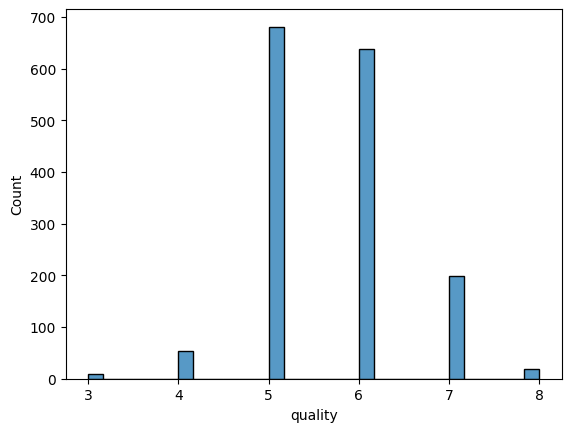

In [135]:
sns.histplot(data['quality'])

품질은 3에서 8까지 6단계가 존재하고, 5와 6에 데이터가 몰려 있다.

## 변수간 상관관계 확인
변수간 상관관계를 확인하여 품질을 예측하기 위한 좋은 변수를 골라보려 한다.

In [136]:
#삼관계수 계산

d_corr = data.corr()
d_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

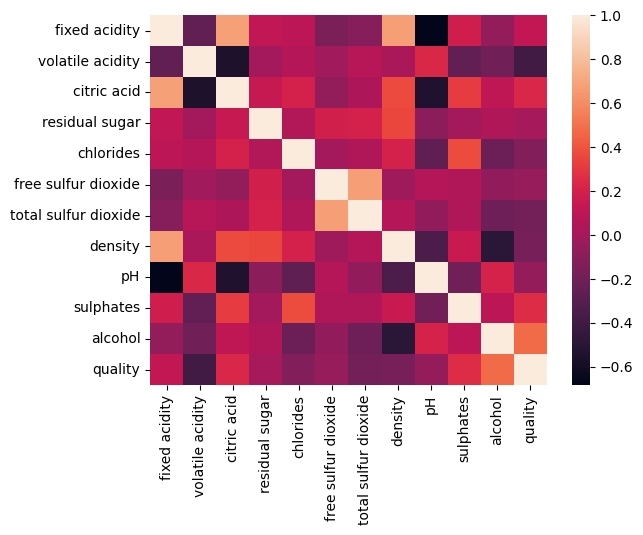

In [137]:
sns.heatmap(d_corr)

alcohol 변수가 quality와 가장 큰 양의 상관계수를 가진다.

# 1. 클러스터링 Clustering

클러스터의 수를 미리 정해두고 클러스터링을 진행하는 K-means 방법을 사용하였다.

## 데이터 전처리

In [139]:
y = data['quality']
X = data.drop('quality',axis=1)

In [140]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [141]:
colums = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [142]:
X = pd.DataFrame(X,columns = colums)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


## k값 설정
예측하고 싶은 와인의 품질(quality)이 6가지가 존재했기 때문에 k값을 6으로 지정해 주었다.

In [143]:
kmean = KMeans(n_clusters = 6, n_init=10)
kmean.fit(X)

KMeans(n_clusters=6, n_init=10)

In [144]:
clusters = kmean.predict(X)
clusters

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [145]:
pca = PCA(n_components = 2)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
reduced_X

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [146]:
reduced_X['cluster'] = clusters
reduced_X

,PC1,PC2,cluster
0,-1.619530,0.450950,2
1,-0.799170,1.856553,2
2,-0.748479,0.882039,2
3,2.357673,-0.269976,0
4,-1.619530,0.450950,2
...,...,...,...
1594,-2.150500,0.814286,1
1595,-2.214496,0.893101,1
1596,-1.456129,0.311746,1
1597,-2.270518,0.979791,2


In [147]:
reduced_centers = pca.transform(kmean.cluster_centers_)
reduced_centers

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 2.09298218, -0.99767127],
       [-1.32352642, -1.01174136],
       [-1.06848569,  0.01608191],
       [ 0.15148392,  1.48408697],
       [ 3.59939563,  1.05498421],
       [ 1.58571538,  3.62081388]])

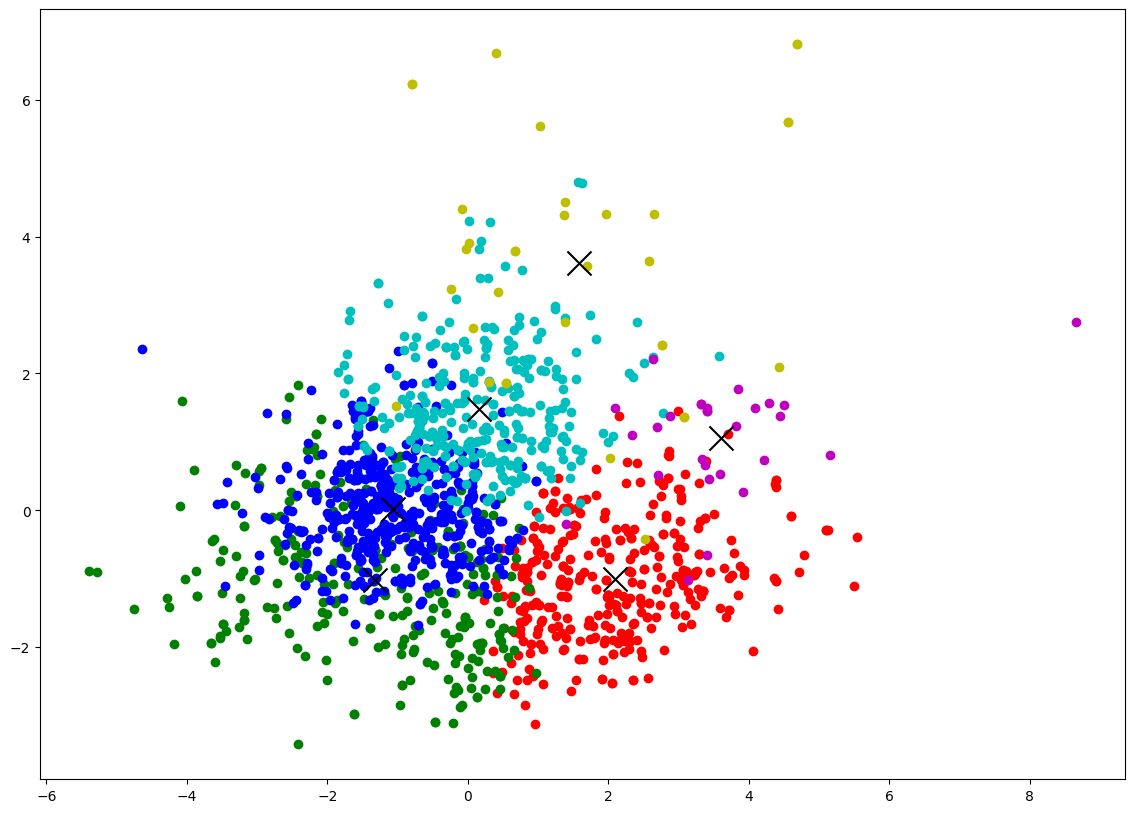

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='r')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='g')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='b')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC2'], color='c')
plt.scatter(reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC2'], color='m')
plt.scatter(reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC2'], color='y')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8 ) 

In [150]:
nn_model = MLPClassifier(hidden_layer_sizes = (256,256), max_iter=500)

nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [151]:
print(f'정확도 : {nn_model.score(X_test,y_test)}')

정확도 : 0.64375


# 2. Linear Regression 선형 회귀

quality와 상관계수가 가장 높은 것이 alohol이었기 때문에 alohol을 가지고 선형회귀분석을 진행해 보았다.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


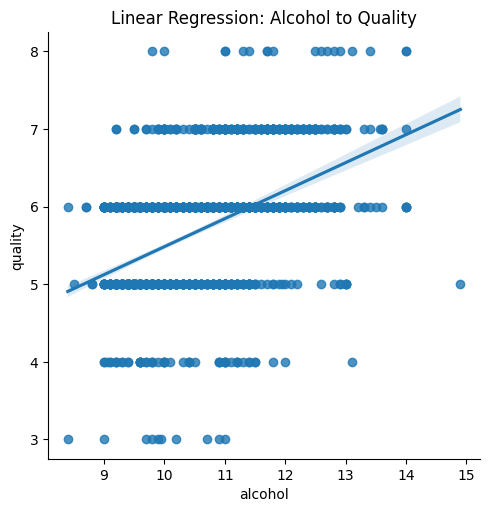

In [170]:
# 시각화
sns.lmplot(x='alcohol', y='quality', data=data)
plt.title('Linear Regression: Alcohol to Quality')
plt.show()

In [173]:
# 선형 회귀 모델 생성
X = sm.add_constant(data['alcohol'])  # 상수 항을 추가
lr = sm.OLS(data['quality'], X).fit()

In [174]:
# 모델 요약 통계 출력
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.83e-91
Time:                        08:06:31   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

In [178]:
# 예측값과 실제값 가져오기
predicted_values = lr.predict(X)
actual_values = data['quality']

# MSE (Mean Squared Error)
mse = ((predicted_values - actual_values) ** 2).mean()
print("Mean Squared Error (MSE):", mse)

# R-squared (결정 계수) 계산
ssr = ((predicted_values - actual_values) ** 2).sum()
sst = ((actual_values - actual_values.mean()) ** 2).sum()
r_squared = 1 - (ssr / sst)
print("R-squared (R2):", r_squared)


Mean Squared Error (MSE): 0.5039840256714571
R-squared (R2): 0.22673436811275482


# 3. Logistic Regression

Softmax를 이용하여 와인의 품질을 좋음(2), 보통(1), 나쁨(0)의 세 그룹으로 분류하려고 한다.
quality가 7 이상일 경우에는 좋음, 6일 경우에는 보통, 5 이하인 경우에는 나쁨으로 분류할 것이다.

## 데이터 전처리

In [210]:
c = []
for q in data['quality'].values:
    if q < 6:
        c.append(0)
    elif q > 6:
        c.append(2)
    else:
        c.append(1)

data['category'] = c
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,good wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,False


## Training

In [211]:
X = data[data.columns[0:11]].values
y = data['category'].values

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [212]:
dataStan=pd.DataFrame(data = Xstan, columns = data.columns[0:11])
dataStan['category']=y
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [213]:
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(Xstan,y)

LogisticRegression(multi_class='multinomial')

In [214]:
softReg.intercept_,softReg.coef_

(array([ 0.66442317,  0.71874285, -1.38316602]),
 array([[-0.24606429,  0.4610216 ,  0.11687615, -0.12348027,  0.21393184,
         -0.16523298,  0.44829069,  0.16662453,  0.02688159, -0.43410725,
         -0.74334566],
        [-0.08634793, -0.08304973, -0.15554726, -0.10287465,  0.07335224,
          0.07372289, -0.05581244,  0.16024679, -0.03830873, -0.03472058,
          0.09238194],
        [ 0.33241222, -0.37797187,  0.03867111,  0.22635492, -0.28728409,
          0.09151009, -0.39247825, -0.32687133,  0.01142714,  0.46882783,
          0.65096371]]))

In [216]:
yhat = softReg.predict(Xstan)
dataStan['predict'] = yhat
dataStan

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category,predict
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0,1
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,1,1
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,1,1
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0,0


## CCE (Categorical Cross-Entropy) 계산

In [217]:
def categorical_cross_entropy(y_true, y_pred):
    """
    Categorical Cross-Entropy (CCE)를 계산하는 함수
    
    Parameters:
        - y_true: 실제 클래스 레이블을 나타내는 배열 (one-hot encoding 또는 정수 인코딩)
        - y_pred: 모델의 예측 확률 배열
    Returns:
        - CCE 손실
    """
    # 로그 손실 계산
    epsilon = 1e-15  # 로그 함수의 분모가 0이 되지 않도록 작은 epsilon 값을 더합니다.
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # 예측 확률을 안전하게 클리핑합니다.
    cce_loss = -np.sum(y_true * np.log(y_pred))
    
    return cce_loss

In [220]:
cce_loss = categorical_cross_entropy(y, yhat)
print("Categorical Cross-Entropy Loss:", cce_loss)

Categorical Cross-Entropy Loss: 8772.849204307313
